In [1]:
#Import libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from scipy import stats
import math
import os
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

# 5.5 Logistic Regression

We use logistic regression when the prediction variable is categorical. 

We will start with binary classes: 

the output can only take on two values, '0' and '1'. 1 is usually used for a succes/confirmation (i.e. a customer has churned, match has been won) and 0 for a fail/loss (patient doesn't have cancer, product not bought).

## 5.5.1 Importing data + making train/test data

We will try to predict if a customer of a firm will churn at the hand of several variables

In [2]:
#make objects
df = pd.read_csv("data/churn.csv")
df = df.drop(["Phone", "Area Code", "State"], axis=1)
X = df.drop(["Churn"], axis=1)
y = df['Churn'].values.tolist()

# Split the data into test and training (30% for test)
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state = 123)

In [3]:
df

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73
5,118,0,223.4,220.6,203.9,6.3,0,0,1,0,98,37.98,101,18.75,118,9.18,6,1.70
6,121,24,218.2,348.5,212.6,7.5,3,0,0,1,88,37.09,108,29.62,118,9.57,7,2.03
7,147,0,157.0,103.1,211.8,7.1,0,0,1,0,79,26.69,94,8.76,96,9.53,6,1.92
8,117,0,184.5,351.6,215.8,8.7,1,0,0,0,97,31.37,80,29.89,90,9.71,4,2.35
9,141,37,258.6,222.0,326.4,11.2,0,0,1,1,84,43.96,111,18.87,97,14.69,5,3.02


In [4]:
#distribution churners and non churners
df.Churn.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

## 5.5.2 Build classification model

In [5]:
# Instantiate the classifier
clf = LogisticRegression()

# Train the classifier using the train data
clf = clf.fit(X_train, Y_train)

/Users/AVNH/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 5.5.2.1 Model evaluation - Confusion Matrix

**Classes**
- Positive class: Churners (equals 1)
- Negative class: Non-churners (equals 0)

**Confusion Matrix outcomes**
- TP: Churners who i correctly predicted as churners
- TN: Non-churners who i correctly predicted as Non-churners
- FP: Non-churners who i wrongly predicted as churners
- FN: Churners who i wrongly predicted as woman

In [6]:
# Make a confusion matrix
prediction = clf.predict(X_test)

conf_matrix = pd.DataFrame(
    confusion_matrix(Y_test, prediction), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)

conf_matrix

,Predicted False,Predicted True
Actual False,841,25
Actual True,106,28


**In sklearn:** 

By definition a confusion matrix C is such that C_{i, j} is equal to the number of observations known to be in group i but predicted to be in group j.

Thus in binary classification
- the count of true negatives is C_{0,0}
- false negatives is C_{1,0}
- true positives is C_{1,1} 
- false positives is C_{0,1}.

So the output of our confusion matrix is as follows:
- TN,FP
- FN,TP 

Evaluation metrics - confusion-matrix:
- **accuracy**: (TP + TN) / (TP + TN + FP + FN)
- **Sensitivity (recall)** : TP / (TP + FN)
- **Specificity**: TN / (TN + FP)
- **positive predictive value (precision)**: TP / (TP + FP)
- **negative predictive value**: TN / (TN + FN)

Intuition:
- **accuracy**: percentage of churners / non-churners i predicted correctly
- **Sensitivity (recall)** : percentage of churners who i correctly predicted as churners
- **specificity**: percentage of non-churners who i correctly predicted as non-churners
- **positive predictive value (precision)**: of all the churners i predicted, how much percentage was in fact churners
- **negative predictive value**: of all the non-churners i predicted, how much percentage was in fact non-churners

In [7]:
accuracy = clf.score(X_test, Y_test)
print('accuracy:', round(accuracy, 3))

cm = confusion_matrix(Y_test, prediction)

TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1, 0]

sensitivity = TP / float(TP + FN)
print ('sensitivity (recall)', round(sensitivity, 3))

specificity = TN / float(TN + FP)
print ('specificity', round(specificity, 3))

precision = TP / float(TP + FP)
print ('precision', round(precision, 3))

npv = TN / float(TN + FN)
print ('negative predictive value', round(npv, 3))

accuracy: 0.869
sensitivity (recall) 0.209
specificity 0.971
precision 0.528
negative predictive value 0.888


In [8]:
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       866
           1       0.53      0.21      0.30       134

   micro avg       0.87      0.87      0.87      1000
   macro avg       0.71      0.59      0.61      1000
weighted avg       0.84      0.87      0.84      1000



**F1-score:** 2*TP / (2*TP + FP + FN). This is the harmonic mean of precision and sensitivity (recall).

If you have a specific goal in your mind like 'Precision is the king. I don't care much about sensitivity (recall)', then there's no problem. Higher precision is better. But if you don't have such a strong goal, you will want a combined metric. That's F-measure.

The importance of F1 score:
- Balanced class: In this situation, the F1 score can effectively be ignored, the mis-classification rate is key.
- Unbalanced class, but both classes are important: If the class distribution is highly skewed (such as 80:20 or 90:10), then a classifier can get a low mis-classification rate simply by choosing the majority class. In such a situation, I would choose the classifier that gets high F1 scores on both classes, as well as low mis-classification rate. A classifier that gets low F1-scores should be overlooked.
- Unbalanced class, but one class if more important that the other. For e.g. in Fraud detection, it is more important to correctly label an instance as fraudulent, as opposed to labeling the non-fraudulent one. In this case, I would pick the classifier that has a good F1 score only on the important class. Recall that the F1-score is available per class.



### 5.5.2.2 Model evaluation - ROC and AUC

ROC Curves are used to see how well your classifier can separate positive and negative examples and to identify the best threshold for separating them.

To be able to use the ROC curve, your classifier has to be ranking - that is, it should be able to rank examples such that the ones with higher rank are more likely to be positive. For example, Logistic Regression outputs probabilities, which is a score you can use for ranking.

**Drawing ROC curve**

Given a data set and a ranking classifier:
- order the test examples by the score from highest to lowest
- start in (0,0)

for each example x in the sorted order
if x is positive, move 1/pos up
if x is negative, move 1/neg right

where pos and neg are the fractions of positive and negative examples respectively.

<img src="figures/roc.gif" style="width: 80%;"/>

0.8238426803626211


<Figure size 432x288 with 0 Axes>

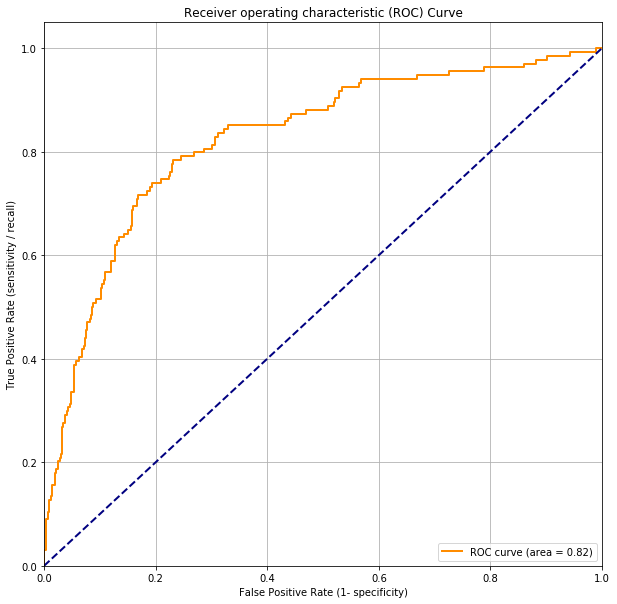

In [10]:
#calculate probabilities that customer will churn for test set
probs = clf.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(Y_test, probs[:,1])

#calculate area under curve
roc_auc = auc(fpr,tpr)
print(roc_auc)

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate (sensitivity / recall)')
plt.xlabel('False Positive Rate (1- specificity)')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [11]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(thresholds):
    print('Sensitivity:', tpr[threshold > thresholds][-1])
    print('Specificity:', 1 - fpr[threshold > thresholds][-1])


evaluate_threshold(0.1)

Sensitivity: 0.8507462686567164
Specificity: 0.6709006928406467


<img src="figures/auc_desc.png" style="width: 100%;"/>

## 5.5.3 Multiclass classification

Examples:
- Email foldering/tagging: work, friends, family, hobby
- Weather: sunny, cloudy, rain, snow


<img src="figures/bin_vs_multiclass.png" style="width: 80%;"/>

In our first model we made an iris species classifier. There were 3 possible classes. How does scikit-learn model this? 

**One-vs-all**

The strategy involves training a single classifier per class, with the observations of that class as positive observations and all other observations as negatives. 

<img src="figures/one_vs_all.png" style="width: 20%;"/>

In the end if you make a prediction for an observation, it will go through each classifier. The output of each classifier is the probability that the observation belongs to that class. Scikit-learn will eventually pick the class that has the highest probablity.

**One-vs-One**

This strategy consists in fitting one classifier per class pair. At prediction time, the class which received the most votes is selected. However, this method may be advantageous for algorithms such as kernel algorithms which don’t scale well with n_samples. This is because each individual learning problem only involves a small subset of the data whereas, with one-vs-the-rest, the complete dataset is used n_classes times.

## 5.5.4 Task 3: Hiring

Load the 'hired.csv' dataframe. It contains data about whoch people were hired at a company. It contains the variables 'hired' (1-yes/0-no), 'education level' (4-high school/6-college/8-PhD), 'experience' (years of relevant experience) and 'gender'. 
- Take a look at the data
- Transform the data if necessary
- Make a training and test dataset (think about your data scales)
- Using logistic regression, model the odds somebody gets hired using only 'experience'
- Evaluate this model with both the test and training set
- Using logistic regression, model the odds somebody gets hired usingall available variables
- Evaluate this model with both the test and training set

## 5.5.5 Solution